## Autoencoders

1.   Import the data
2.   Convert the data to black and white format
3.    Append all the batches
4.    Construct the training dataset
5.    Construct an image visualizer

In [1]:
import numpy as np
import tensorflow as tf
import pickle

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [2]:
# convert to grayscale
def grayscale(im):
    return im.reshape(im.shape[0], 3,32,32).mean(1).reshape(im.shape[0], -1)

In [3]:
# load data into memory
data, labels = [],[]
for i in range(1,6):
    filename = './cifar-10-batches-py/data_batch_'  + str(i)
    open_data = unpickle(filename)
    if len(data) > 0:
        data = np.vstack((data, open_data['data']))
        labels = np.hstack((labels, open_data['labels']))
    else:
        data = open_data['data']
        labels = open_data['labels']

data = grayscale(data)
x = np.matrix(data)
y = np.array(labels)
print(x.shape)

(50000, 1024)


In [4]:
# horse image
horses_i = np.where(y == 7)[0]
horses_x = x[horses_i]
print(np.shape(horses_x))

(5000, 1024)


In [5]:
# create a visualization function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

def plot_image(image, shape=[32,32], cmap='Greys_r'):
    plt.imshow(image.reshape(shape), cmap=cmap, interpolation='nearest')
    plt.axis('off')

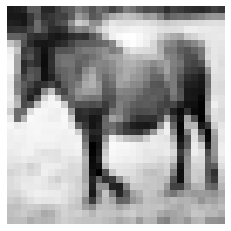

In [6]:
plot_image(horses_x[0], shape=[32,32], cmap='Greys_r')

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.
(1, 1024)


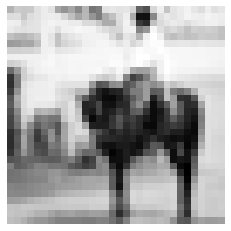

In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
# set dataset estimator
## Parameters
n_inputs = 32 * 32
BATCH_SIZE = 1
batch_size = tf.placeholder(tf.int64)

# using a placeholder
x = tf.placeholder(tf.float32, shape=[None,n_inputs])
## Dataset
dataset = tf.data.Dataset.from_tensor_slices(x).repeat().batch(batch_size)
iter = dataset.make_initializable_iterator() # create the iterator
features = iter.get_next()

## Print the image
with tf.Session() as sess:
    # feed the placeholder with data
    sess.run(iter.initializer, feed_dict={x: horses_x,
                                         batch_size: BATCH_SIZE}) 
    print(sess.run(features).shape) 
    plot_image(sess.run(features), shape=[32, 32], cmap = "Greys_r")

### Build the Model

    Define the parameters
    Define the layers
    Define the architecture
    Define the optimization
    Run the model
    Evaluate the model

In [8]:
from functools import partial

# encoder
n_hidden_1 = 300
n_hidden_2 = 150

# decoder 
n_hidden_3 = n_hidden_1
n_outputs = n_inputs

learning_rate = 0.01
l2_reg = 0.0001

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [10]:
## Define the Xavier initialization
xav_init =  tf.keras.initializers.glorot_uniform()
## Define the L2 regularizer
l2_regularizer = tf.keras.regularizers.l2(l2_reg)

In [24]:
# create dense layer
dense_layers = partial(tf.keras.layers.Dense,
                       activation=None,
                       kernel_initializer=xav_init,
                       kernel_regularizer=l2_regularizer)

In [25]:
# define layer
hidden_1 = dense_layers(features, n_hidden_1)
hidden_2 = dense_layers(n_hidden_1, n_hidden_2)
hidden_3 = dense_layers(n_hidden_2, n_hidden_3)
outputs = dense_layers(hidden_3, n_outputs, activation=None)

TypeError: __init__() got multiple values for argument 'activation'